# Quantum two-level system with decay using Lindblad master equation

In [43]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [44]:
# Lets start defining the Pauli matrices and raising/lowering operators

# define sigma z
sz= np.array([[1,0],
             [0,-1]])
# define sigma x
sx= np.array([[0,1],
             [1,0]])
# define sigma plus
sp= np.array([[0,1],
             [0,0]])
# define sigma minus
sm= np.array([[0,0],
             [1,0]])
# define identity
Id = np.eye(2)

In [45]:
# Now we define the system parameters (arbitrary units)
Delta=5 # detuning
Omega=5 # Rabi frequency 
Gamma=0.5 # decay rate

# and the time parameters
dt=0.005
tsteps=1000

In [ ]:
# Hamiltonian
H = Delta*sz + Omega*sx   # by it's own it would generate Rabi oscillations on the system

# To represent the efect of the commutator we can use matrices of higher dimension using the Kronecker product (np.kron) also called tensor product
# Liouvillian superoperator
L=(1j*(np.kron(H,Id) - np.kron(Id,H.T)) +    # this superoperator represents the commutator [H,rho]
   Gamma*(2*np.kron(sm,sp.T) - np.kron(sp@sm,Id) - np.kron(Id,sp@sm)))  # this part represents the Lindblad dissipator for decay
# 1j is the imaginary unit
# A rho B is represented as np.kron(A,B.T) when using the superoperator formalism, where .T is the transpose
# in a more general way, the product tensor of A and B is represented as np.kron(A,B)

#dynamical map
E=expm(L*dt)

In [47]:
rho = np.array([[1,0],
             [0,0]])

# we need to flatten the density matrix to apply the superoperator, which works on vectors
rhov = rho.flatten()  # flatten passes a matrix to a vector by stacking its columns

# A vector to store the excited state population, represented by the first element of the flattened density matrix rhot[0]
pe=np.zeros(tsteps)
# A copy of the initial state to be updated at each time step
rhot=rhov

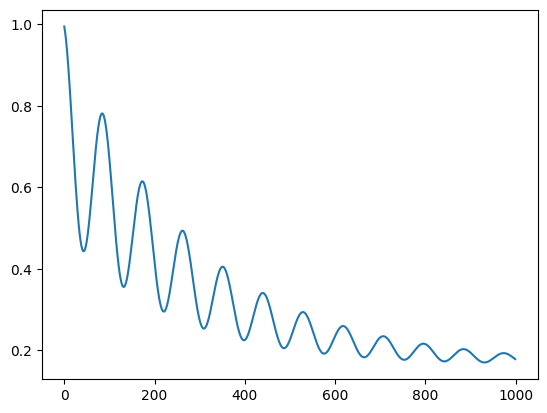

In [48]:
for ti in np.arange(0,tsteps,1):
    rhot=E@rhot
    pe[ti]=np.real(rhot[0])
    
plt.plot(pe)